## Tutorial #2: Visualize EEG Data

EEG data contain rich information over multiple dimensions, in space (i.e. over electrodes distributed on the scalp) and time. It is crucial to be able to efficiently visualize this information, in order to get a first understanding of the type of responses and activity that our EEG data contain.

The main focus of this chapter is to provide an overview of visualization tools for eeg data. Various visualization strategies on an example dataset will be provided. For this aim, we will use custom functions, and also built-in code, provided by 'viz' module of the MNE package.

In [2]:
import mne
# For elimiating warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
#Load epoched data
data_file = '../study1/study1_eeg/epochdata/P-02'

# Read the EEG epochs:
epochs = mne.read_epochs(data_file + '.fif', verbose='error')

Before any attempt to visualize data with MNE package, the mne.viz module should be imported.

In [5]:
import mne.viz
%matplotlib inline

### 1.) Plotting time-courses of EEG activity

#### 1.1 Plotting single-trial epoched data

When visualizing any EEG dataset, the first step usually concerns a visual inspection of single-trial data. With this inspection we can go through all of the recorded epochs in order to evaluate the quality of our dataset. Our goal is to understand:

(a) are there any electrodes with excessive noise that should be interpolated?</br>

(b) are there excessive eye blinks that need to be removed?</br>

(c) which epochs are noisy and we need to exclude from further analysis?</br>

The simplest way to do a visual inspection of an EEG dataset is by using the plot() MNE function, which plots epochs as its name indicates. The y axis shows the channel names while the x axis is showing the epoch numbers. Additionally above the plot, we can see the ratio of each event type. Please note that we only use Familiar events in the dataset throughout the tutorials.

For example, in the dataset that we are using the ratio of Pleasant familiar epochs is 0.34, Neutral familiar 0.33 and Unpleasant familiar 0.33:

Percentage of Pleasant familiar events :  0.34
Percentage of Neutral familiar events :  0.33
Percentage of Unpleasant familiar :  0.33


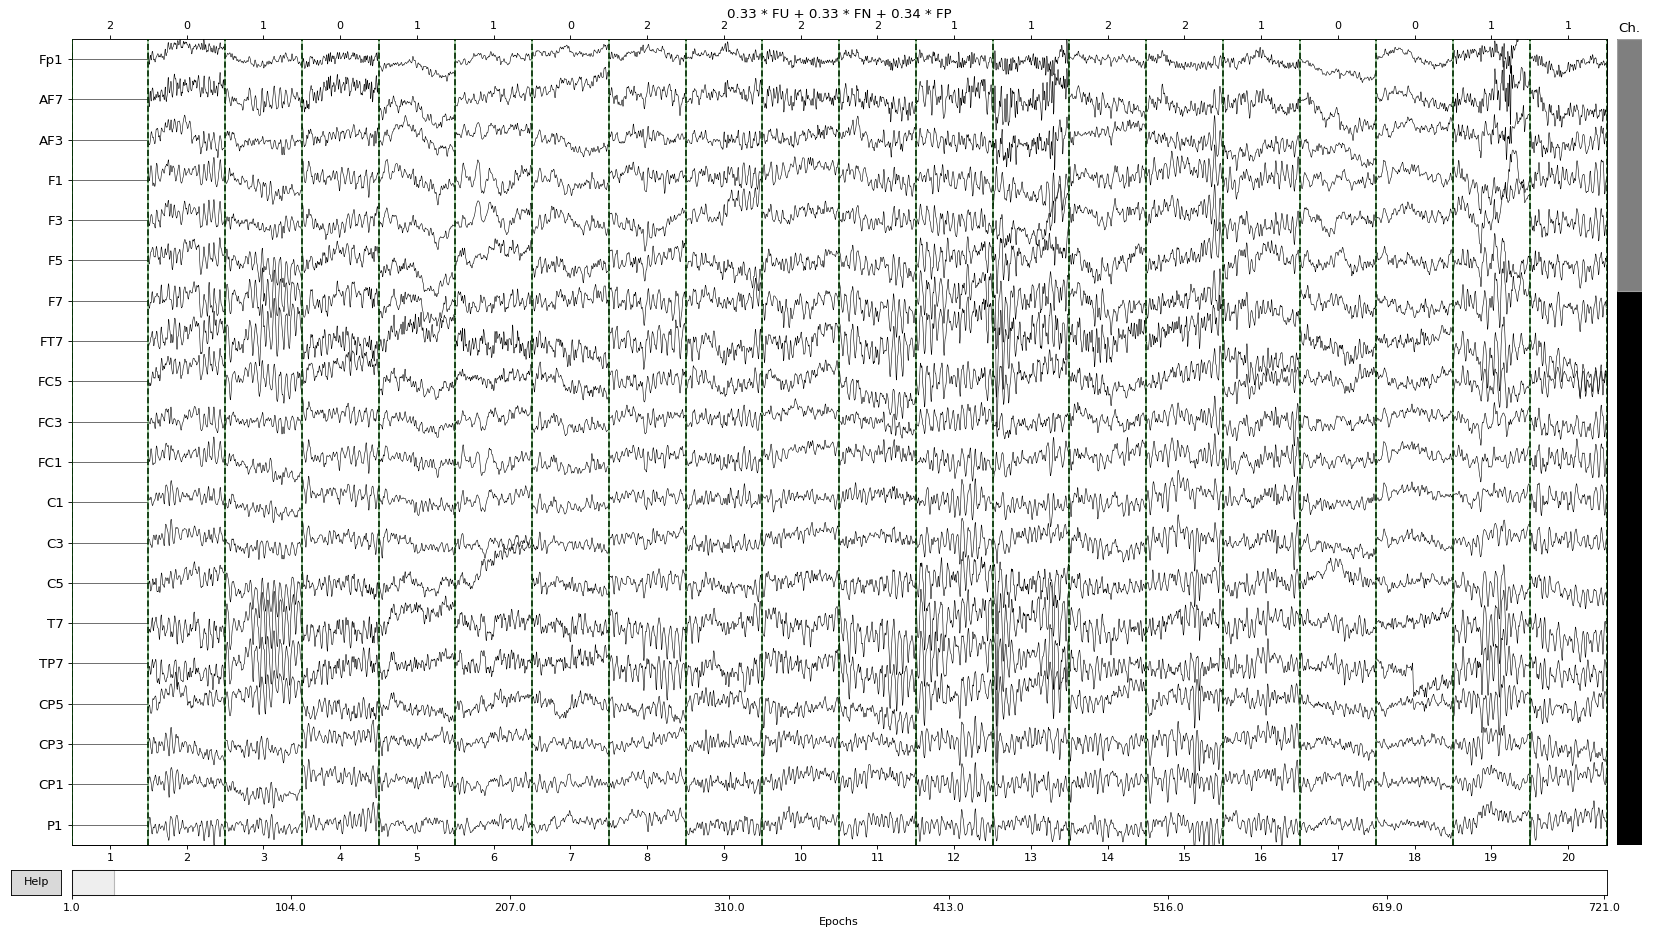

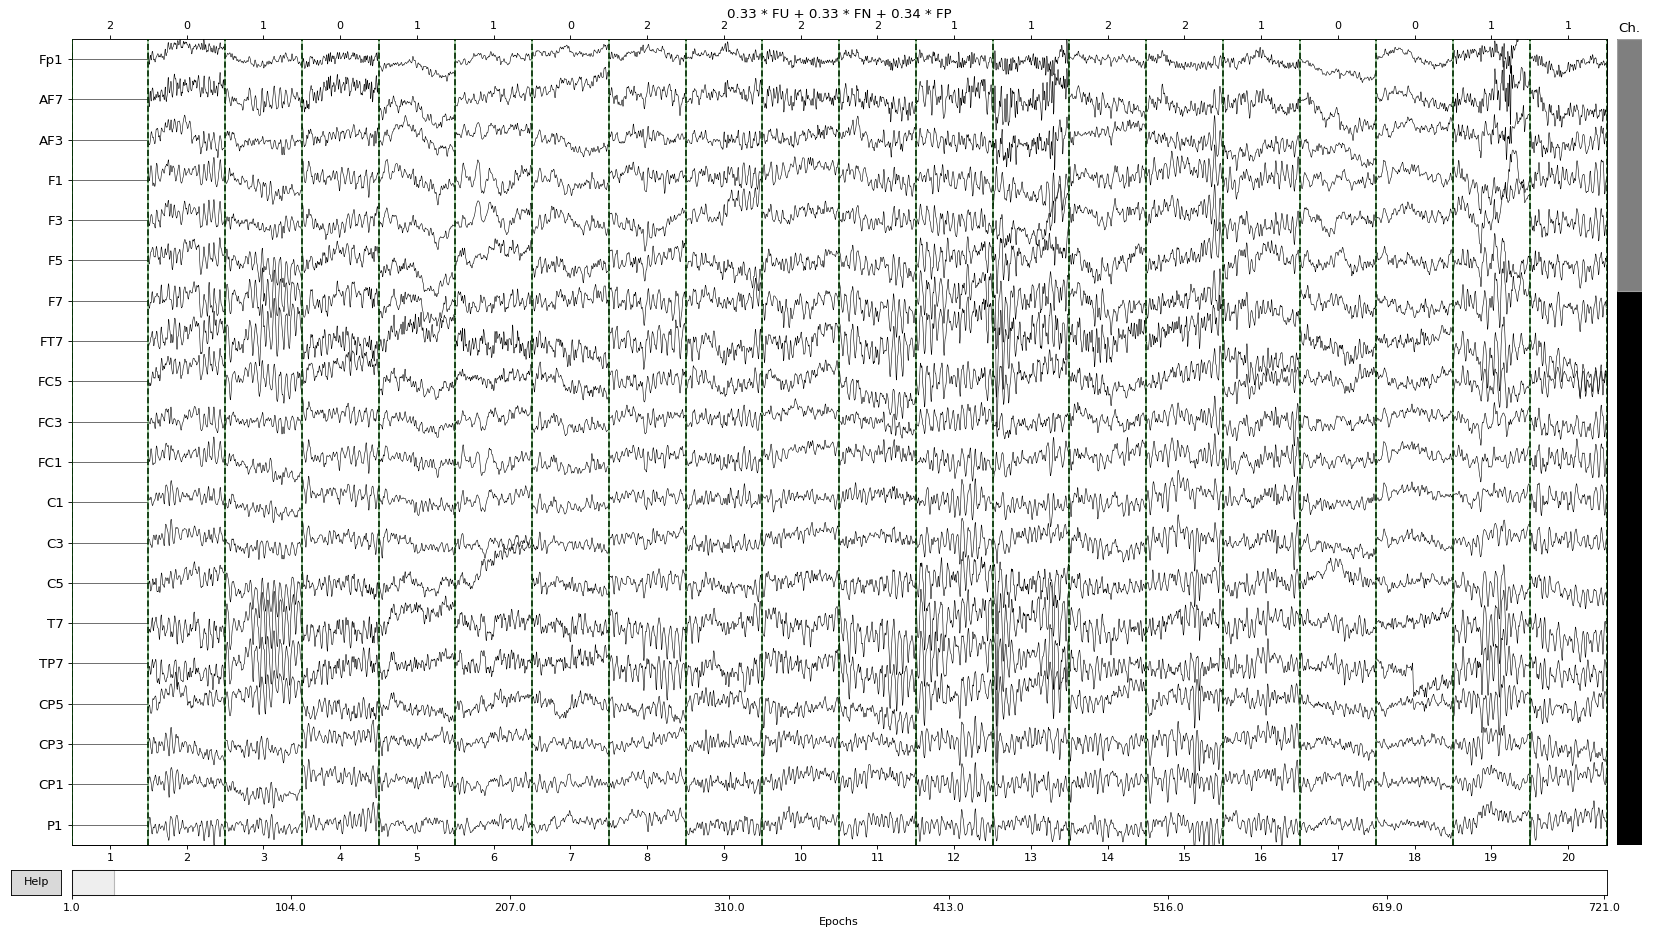

In [6]:
import numpy as np
epochs = epochs['FP', 'FN', 'FU']
print('Percentage of Pleasant familiar events : ', np.around(len(epochs['FP'])/len(epochs), decimals=2))
print('Percentage of Neutral familiar events : ',np.around(len(epochs['FN'])/len(epochs), decimals=2))
print('Percentage of Unpleasant familiar : ', np.around(len(epochs['FU'])/len(epochs), decimals=2))
epochs.plot(scalings='auto')

The .plot() function can be also used in an interactive mode, through the magic:

%matplotlib tk

It then allows the user to scrol through epochs and electrodes and click on the ones that need to be excluded.

#### 1.2. Plotting average epochs

Single-trial epoch data are usually very noisy. One way of overcoming this drawback is by averaging data over many epoch repetitions, and focusing on average epoch responses, the so-called average Event-Related Potentials, or ERPs.

This technique has been widely used in the field of EEG research, as it allows eliminating responses that are irrelevant to a given task. Indeed, average ERPs only contain activity that appears at consistent latencies and electrode locations across repetitions.

A typical image of an average ERP response will show 'low' activity during the baseline i.e. before a stimulus occurs. This is often then followed by large positive or negative deflections of EEG signals during the post-stimulus period, reflecting the average response to an external stimulus.

In the following example, we can see the average ERP in response to familiar pleasant events, plotted by overlaying all electrodes across time:

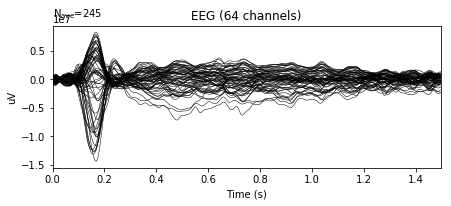

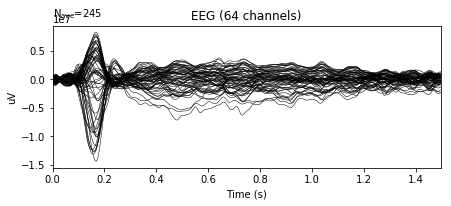

In [7]:
epochs['FP'].average().plot()

Average ERP data can be plotted via the matplotlib library too. In the following example, the average ERP of the three experimental condition at channel 18 is provided.

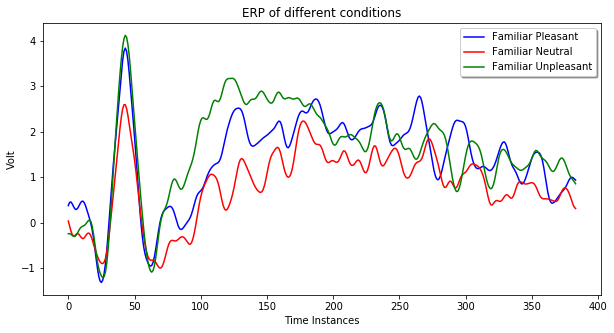

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

fp = epochs['FP']
fn = epochs['FN']
fu = epochs['FU']
ch = 18
conditions = ['FP', 'FN', 'FU']

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Time Instances')
ax.set_ylabel('Volt')

ax.plot(fp.average().data[ch, :], color='blue', label='Familiar Pleasant')
ax.plot(fn.average().data[ch, :], color='red', label='Familiar Neutral')
ax.plot(fu.average().data[ch, :], color='green', label='Familiar Unpleasant')

legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
plt.title('ERP of different conditions')
plt.show()



#### 1.3 Plotting topographic information

Apart from time-courses of activity, another way to visualize EEG data is as voltage topographies. Topographies display the EEG voltage values at each channel on the scalp. They are similar to a heat map where different voltage ranges are represented with different colors. 

Topographies allow us to inspect at once the distribution of voltage values on the scalp. This is particularly advantageous, as they can be informative of all electrodes at once, and not just at single ERP components.


The easiest way to plot topographies is through MNE, which has an evoked class function named plot_topomap(). This function takes a time range and type of the channels as parameters and it plots the a topographic map with given data. On the right side of the plot, a color map is provided to undertand the volt ranges that each color represents. Dots on the scalp figures show the location of electrodes.

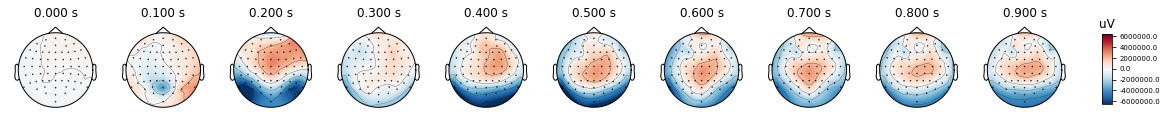

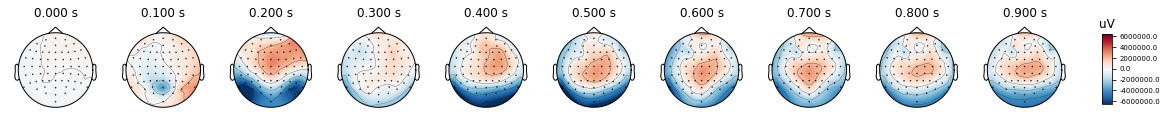

In [9]:
%matplotlib inline
times = np.arange(0, 1, 0.1)
epochs.average().plot_topomap(times, ch_type='eeg')

#### 1.4 Plotting Channels

Mean Event-Related Potential on given channel is plotted via following function.

In [10]:
import pylab, seaborn as sns
from scipy.stats import ttest_rel, sem

def plot_conditions(data, times, plot_title):

    sns.set(style="white")
    ColorsL = np.array(([228,26,28], [55,126,184], [77,175,74], [152,78,163], [255,127,0]))/256
    col_axes = np.array((82, 82, 82))/256

    al = 0.2
    fig = plt.figure(num=None, figsize=(4, 2), dpi=150)

    
    epochs_mean = np.mean(data, axis = 0)
    epochs_std = sem(data, axis = 0)/2

    plt.plot(times, epochs_mean, color = ColorsL[0], linewidth = 2)
    plt.fill_between(times, epochs_mean, epochs_mean + epochs_std, color = ColorsL[0], interpolate=True, alpha = al)
    plt.fill_between(times, epochs_mean, epochs_mean - epochs_std, color = ColorsL[0], interpolate=True, alpha = al)
    plt.ylabel('Mean ERP')
    plt.xlabel('Times')
    plt.title(plot_title)

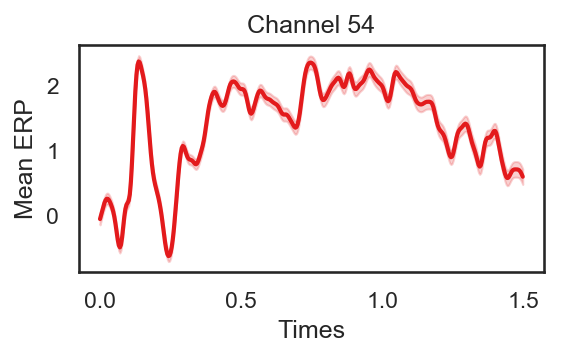

In [11]:
plot_conditions(epochs.get_data()[:,54,:], epochs.times, 'Channel 54')